#Merging police data for the whole date range and all police forces from London

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import glob

In [ ]:
months = list(range(1, 13))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
years = list(range(2018, 2022))
years

[2018, 2019, 2020, 2021]

In [ ]:
#getting list of all dates to be substituted in file paths
dates = []
for year in years:
    for m in months:
        date = f"{year}"+"-{:0>2d}".format(m)
        dates.append(date)
dates

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09',
 '2021-10',
 '2021-11',
 '2021-12']

In [ ]:
len(dates)

48

In [ ]:
#remove dates for which there is no data

dates = dates[:45]
dates

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09']

In [ ]:
#getting csv file names for all forces street data from folders arranged by dates
file_names_street = []
for date in dates:
    path = f'police_data\\{date}\\'
    files = glob.glob(path + '\\*-street.csv')
    file_names_street.extend(files)
file_names_street

['police_data\\2018-01\\2018-01-city-of-london-street.csv',
 'police_data\\2018-01\\2018-01-metropolitan-street.csv',
 'police_data\\2018-02\\2018-02-city-of-london-street.csv',
 'police_data\\2018-02\\2018-02-metropolitan-street.csv',
 'police_data\\2018-03\\2018-03-city-of-london-street.csv',
 'police_data\\2018-03\\2018-03-metropolitan-street.csv',
 'police_data\\2018-04\\2018-04-city-of-london-street.csv',
 'police_data\\2018-04\\2018-04-metropolitan-street.csv',
 'police_data\\2018-05\\2018-05-city-of-london-street.csv',
 'police_data\\2018-05\\2018-05-metropolitan-street.csv',
 'police_data\\2018-06\\2018-06-city-of-london-street.csv',
 'police_data\\2018-06\\2018-06-metropolitan-street.csv',
 'police_data\\2018-07\\2018-07-city-of-london-street.csv',
 'police_data\\2018-07\\2018-07-metropolitan-street.csv',
 'police_data\\2018-08\\2018-08-city-of-london-street.csv',
 'police_data\\2018-08\\2018-08-metropolitan-street.csv',
 'police_data\\2018-09\\2018-09-city-of-london-street.cs

In [ ]:
#merging csv files from every force and every date 

parse_dates = ['Month']
street_2020 = pd.read_csv('police_data/2020-01/2020-01-city-of-london-street.csv', dtype={'Crime ID': str, 'Month': str, 'Longitude': 'float64', 'Latitude': 'float64', 'Context': 'float64'}, parse_dates=parse_dates)

for file_name in file_names_street[1:]:
    print(file_name)
    try:
        parse_dates = ['Month']
        street_month = pd.read_csv(file_name, dtype={'Crime ID': str, 'Month': str, 'Reported by':str, 'Falls within':str, 'Longitude': 'float64', 'Latitude': 'float64', 'Location':str, 'LSOA code':str, 'LSOA name':str, 'Crime type':str, 'Last outcome category': str,'Context': 'float64'}, parse_dates=parse_dates)
        street_2020 = pd.merge(street_2020, street_month, how='outer', on=['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude', 'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type', 'Last outcome category', 'Context'])
    except Exception as e: 
        print(f'The following file: {file_name} failed to merge.')
        print(f'The reason for not merging correctly: {e}')
        

police_data\2018-01\2018-01-metropolitan-street.csv
police_data\2018-02\2018-02-city-of-london-street.csv
police_data\2018-02\2018-02-metropolitan-street.csv
police_data\2018-03\2018-03-city-of-london-street.csv
police_data\2018-03\2018-03-metropolitan-street.csv
police_data\2018-04\2018-04-city-of-london-street.csv
police_data\2018-04\2018-04-metropolitan-street.csv
police_data\2018-05\2018-05-city-of-london-street.csv
police_data\2018-05\2018-05-metropolitan-street.csv
police_data\2018-06\2018-06-city-of-london-street.csv
police_data\2018-06\2018-06-metropolitan-street.csv
police_data\2018-07\2018-07-city-of-london-street.csv
police_data\2018-07\2018-07-metropolitan-street.csv
police_data\2018-08\2018-08-city-of-london-street.csv
police_data\2018-08\2018-08-metropolitan-street.csv
police_data\2018-09\2018-09-city-of-london-street.csv
police_data\2018-09\2018-09-metropolitan-street.csv
police_data\2018-10\2018-10-city-of-london-street.csv
police_data\2018-10\2018-10-metropolitan-stree

In [ ]:
street_2020.to_csv('london2018_2021.csv', encoding='utf-8', date_format='%Y-%m', index=False)

#Data cleaning -  London

In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/crime-pre-and-after-covid/data/london2018_2021.csv')
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,37c663d86a53d4d8a0f633da20f60b89f201946e457613...,2020-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Theft from the person,Investigation complete; no suspect identified,NaN
1,5b89923fa5e0c063cc0f790d720dcda5b97233f83a59a6...,2020-01,City of London Police,City of London Police,-0.117684,51.522003,On or near Rugby Street,E01000920,Camden 027D,Drugs,Court result unavailable,NaN
2,07172682a8b21c30ad259613b19fade5e77da530b4cfe6...,2020-01,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN
3,14e02a6048afd13151cb18261285cca2754316d18a1147...,2020-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Unable to prosecute suspect,NaN
4,fb3350ce8e04310c4763ea0f9622c7326e6323b72d7c3b...,2020-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN


In [ ]:
data.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
810418,a4ce0d323fd2eb431c8ef4b51e88fe7cfd2d77b62d1300...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810419,6d28a027e9145d8240dc8b8a89660576e17402d41f9560...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810420,1dbe537f3efe052823f5ee0a199002c91ceb9e1da764dc...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810421,f008e359543fb3c4cdf88c244e0139ee2b9267839b1360...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
810422,36237c5e7a39e6a97d67181c11f479cb86b6ff67a8f7af...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179022 entries, 0 to 4179021
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 382.6+ MB


In [ ]:
# convert columns to similar case
data.columns = map(str.lower, data.columns)

### Dealing with Duplicates and Null Values

In [ ]:
x = data['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

135513

In [ ]:
#x
duplicate_check = data[data['crime id']=='490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a8ee20ed3c3b7319bc3']
duplicate_check

,crime id,month,reported by,falls within,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,context
3408061,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408062,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408063,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408064,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408065,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3408125,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408126,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408127,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
3408128,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN


In [ ]:
data = data.drop_duplicates(subset=['crime id'])

In [ ]:
#confirm no duplicates
x = data['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2892594 entries, 0 to 4179021
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   crime id               object 
 1   month                  object 
 2   reported by            object 
 3   falls within           object 
 4   longitude              float64
 5   latitude               float64
 6   location               object 
 7   lsoa code              object 
 8   lsoa name              object 
 9   crime type             object 
 10  last outcome category  object 
 11  context                float64
dtypes: float64(3), object(9)
memory usage: 286.9+ MB


In [ ]:
#check for null values in dataset
data.isna().sum()

crime id                       1
month                          0
reported by                    0
falls within                   0
longitude                  40270
latitude                   40270
location                       0
lsoa code                  40270
lsoa name                  40270
crime type                     0
last outcome category          1
context                  2892594
dtype: int64

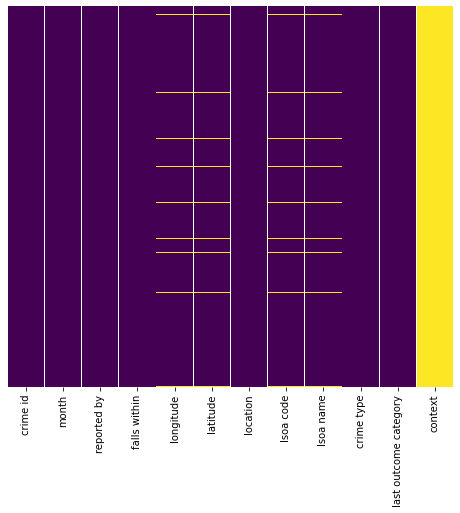

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualize the null values
plt.figure(figsize = (8,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

In [ ]:
# entrie column is null values
data.drop('context', inplace=True, axis=1)

In [ ]:
# fill in nulls
data['last outcome category'] = data['last outcome category'].fillna("Other not Known")

In [ ]:
# drop remaining nulls that can not be filled in ie lat, long
data.dropna(inplace=True)

In [ ]:
# re-check for null values in dataset
data.isna().sum()

crime id                 0
month                    0
reported by              0
falls within             0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
dtype: int64

### Understand the Categorical Columns

In [ ]:
#check different location types reported
x = data['location'].value_counts()
y = data['location'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

On or near Supermarket           117196
On or near Parking Area           79353
On or near Shopping Area          78613
On or near Petrol Station         60251
On or near Nightclub              39096
                                  ...  
On or near Halston Drive              1
On or near Lyveden Place              1
On or near Fleet Way                  1
On or near Stanley Webb Close         1
On or near Carmel Avenue              1
Name: location, Length: 38498, dtype: int64


There are are 38498 categories 


In [ ]:
#check different crime types reported
x = data['crime type'].value_counts()
y = data['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    753580
Vehicle crime                   405139
Other theft                     380150
Burglary                        257118
Criminal damage and arson       194643
Public order                    176382
Drugs                           156649
Theft from the person           149113
Shoplifting                     143339
Robbery                         104701
Bicycle theft                    77880
Other crime                      34278
Possession of weapons            19351
Name: crime type, dtype: int64


There are are 13 categories 


In [ ]:
#check different outcome types 
x = data['last outcome category'].value_counts()
y = data['last outcome category'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Investigation complete; no suspect identified          1367464
Status update unavailable                              1066233
Under investigation                                     118171
Court result unavailable                                102522
Local resolution                                         92694
Offender given a caution                                 25932
Offender given penalty notice                            20251
Awaiting court outcome                                   18506
Offender sent to prison                                   6280
Offender given a drugs possession warning                 6038
Offender given community sentence                         5844
Defendant found not guilty                                5065
Offender fined                                            4775
Court case unable to proceed                              3364
Offender given suspended prison sentence                  2547
Unable to prosecute suspect                            

In [ ]:
#create a function to clean the 'LSOA name' column by removing the code
def get_borough(item):
    if not pd.isna(item):
        #print(item, type(item))
        return item[:-5]
    else:
        return item

In [ ]:
data['borough_london'] = data['lsoa name'].apply(get_borough)

In [ ]:
x = data['borough_london'].value_counts()
y = data['borough_london'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Westminster     205089
Southwark       118548
Newham          116436
Camden          114012
Lambeth         112789
                 ...  
West Lindsey         1
Hyndburn             1
Harborough           1
Lichfield            1
Rutland              1
Name: borough_london, Length: 346, dtype: int64


There are are 346 categories 


In [ ]:
#London has 33 boroughs, our dataset shows 346 areas - some of the crimes reported by London police forces have location outside London

london_boroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster']

def if_borough(item):
  if item['borough_london'] in london_boroughs:
    return True
  else:
    return False

data_filtered = data[data.apply(if_borough, axis = 1)]
data_filtered

,crime id,month,reported by,falls within,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london
0,37c663d86a53d4d8a0f633da20f60b89f201946e457613...,2020-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Theft from the person,Investigation complete; no suspect identified,Camden
1,5b89923fa5e0c063cc0f790d720dcda5b97233f83a59a6...,2020-01,City of London Police,City of London Police,-0.117684,51.522003,On or near Rugby Street,E01000920,Camden 027D,Drugs,Court result unavailable,Camden
2,07172682a8b21c30ad259613b19fade5e77da530b4cfe6...,2020-01,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,Camden
3,14e02a6048afd13151cb18261285cca2754316d18a1147...,2020-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Unable to prosecute suspect,Camden
4,fb3350ce8e04310c4763ea0f9622c7326e6323b72d7c3b...,2020-01,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,Camden
...,...,...,...,...,...,...,...,...,...,...,...,...
4177039,4df8a442757511e6b4c276ead8b9bd5f93afe9197b6e2b...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster
4177040,e06f9e3c22b23a93d39757d534972fe10d6a0aa8b2bd2d...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,E01004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster
4177041,9de33d997882dea0437f66a452c13a9aff84cefc4c7622...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster
4177042,c638691e4d5801ada65994c3199d342bf57b71cc8394ee...,2021-09,Metropolitan Police Service,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster


In [ ]:
#check the borough_london values
x = data_filtered['borough_london'].value_counts()
y = data_filtered['borough_london'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Westminster               205089
Southwark                 118548
Newham                    116436
Camden                    114012
Lambeth                   112789
Tower Hamlets             112181
Croydon                   108865
Hackney                   107813
Haringey                  102747
Ealing                     99751
Brent                      98763
Enfield                    98132
Barnet                     97587
Islington                  94468
Hillingdon                 93273
Lewisham                   92766
Greenwich                  88119
Wandsworth                 86832
Hounslow                   84514
Redbridge                  81191
Waltham Forest             80447
Bromley                    78789
Hammersmith and Fulham     71234
Kensington and Chelsea     70725
Barking and Dagenham       63473
Havering                   60578
Bexley                     54187
Harrow                     52724
Merton                     47299
Sutton                     44137
Richmond u

In [ ]:
# saving the dataframe
#data_filtered.to_csv('data/cleaned.csv', index=False)

In [ ]:
#data = pd.read_csv('data/cleaned.csv')
#data

# API - getting stringency of Covid measures

In [ ]:
import requests
from pprint import pprint
import pandas as pd
import datetime

In [ ]:
# covid tracker api
# format: https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/{YYYY-MM-DD}/{YYYY-MM-DD}
start_date = datetime.date(2021, 9, 1)
end_date = datetime.date(2021, 9, 30)
day_count = (end_date - start_date).days
print(day_count)

# api
response_covid = requests.get(
    f'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/{start_date}/{end_date}'
)

# turning it to json
covid_json = response_covid.json()
data = covid_json['data']

29


In [ ]:
# ['date_value']
pprint(data['2021-09-01']['GBR'])

{'confirmed': 6825074,
 'country_code': 'GBR',
 'date_value': '2021-09-01',
 'deaths': 132742,
 'stringency': 43.98,
 'stringency_actual': 43.98,
 'stringency_legacy': 55.48,
 'stringency_legacy_disp': 55.48}


In [ ]:
def get_stringency():
    '''
    gets the stringency rate (lockdown severity) for each day 
    '''
    #creating an emopty list for the stringencies
    stringency_total = list()
    stringency_date = list()
    # setting the date range
    total_date = pd.date_range(start='2021-01-1', end='2021-09-30')
    # making the format right
    total_date.freq = None
    total_date = total_date.strftime('%Y-%m-%d')
    total_date = total_date.to_list()

    # looping through the json for the stringencies
    for day in total_date:
        stringency_total.append(data[day]['GBR']['stringency'])
        stringency_date.append(data[day]['GBR']['date_value'])
        
    # get_stringency.stringency_df to be able to use it outside the function
    d = {'date':stringency_date,'stringency':stringency_total}
    # turning it to df and saving as csv
    get_stringency.stringency_df = pd.DataFrame(d, columns=['date','stringency'])
    get_stringency.stringency_df.to_csv(
        '/Users/vasilina/Desktop/cfg_group_project/stringency.csv',
        index=False)

    return get_stringency.stringency_df


get_stringency()

,date,stringency
0,2021-09-01,43.98
1,2021-09-02,43.98
2,2021-09-03,43.98
3,2021-09-04,43.98
4,2021-09-05,43.98
5,2021-09-06,43.98
6,2021-09-07,43.98
7,2021-09-08,43.98
8,2021-09-09,43.98
9,2021-09-10,41.20


In [ ]:
# for stringency actions: https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/GBR/2021-09-01

def get_lockdown_state(date):
    '''
    outputs information on the severity of the lockdown or the measures in place by the goverment
    schools closing, restrictions on gatherings etc for only a speccific date (so no range) 
    '''
    covid_api=f'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/GBR/{date}'
    response_covid = requests.get(url=covid_api)
    covid_json = response_covid.json()
    return pprint(covid_json)

get_lockdown_state(date='2020-07-01') # example date 

{'policyActions': [{'flag_value_display_field': 'General',
                    'flagged': False,
                    'is_general': False,
                    'notes': 'As of July 1st, all levels of education remain '
                             'closed in Scotland and Northern Ireland, with '
                             'some school levels in set to reopen in August. '
                             'In Wales on 29th June some school year groups '
                             'opened up for �check in and catch up�. In '
                             'England, children in nursery, reception, year 1 '
                             'and year 6 can return to school. English schools '
                             'remain closed for other year groups except for '
                             'children of key workers. Universities remain '
                             'closed. \r\n'
                             '\r\n'
                             'Scotland- '
                             'https

In [ ]:
#The stringency data was processed in Excel by calculating the average stringency for each month

##Adding the stringency column

In [ ]:
data =  pd.read_csv('cleaned.csv')

In [ ]:
data.head()

,Unnamed: 0,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london
0,0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden
1,3,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden
2,4,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
3,5,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
4,6,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London


In [ ]:
data.shape 

(2852859, 12)

In [ ]:
#get  all dates
dates = data['month'].unique()
dates

array(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09'], dtype=object)

In [ ]:
stringency = pd.read_csv('stringency.csv')

In [ ]:
stringency.head()

,date,stringency
0,2020-03-01,37.484
1,2020-03-01,37.484
2,2020-03-01,37.484
3,2020-03-01,37.484
4,2020-03-01,37.484


In [ ]:
#remove duplicate dates from stringency.csv
stringency_dups_rm = stringency.drop_duplicates()

In [ ]:
stringency_dups_rm

,date,stringency
0,2020-03-01,37.484000
31,2020-04-01,79.630000
61,2020-05-01,74.045000
92,2020-06-01,70.978966
122,2020-07-01,65.184000
153,2020-08-01,67.560333
184,2020-09-01,65.611379
214,2020-10-01,67.901333
245,2020-11-01,68.100690
275,2020-12-01,86.885161


In [ ]:
def change_date(item):
    
        return item[:7]

In [ ]:
#change remove day from date column to match the main data
stringency_dups_rm['date'] = stringency_dups_rm['date'].apply(change_date)

<ipython-input-12-a145fbcd6881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stringency_dups_rm['date'] = stringency_dups_rm['date'].apply(change_date)


In [ ]:
#change remove day from date column to match the main data
stringency_dups_rm['date'] = stringency_dups_rm['date'].apply(change_date)

<ipython-input-12-a145fbcd6881>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stringency_dups_rm['date'] = stringency_dups_rm['date'].apply(change_date)


In [ ]:
stringency_dups_rm

,date,stringency
0,2020-03,37.484000
31,2020-04,79.630000
61,2020-05,74.045000
92,2020-06,70.978966
122,2020-07,65.184000
153,2020-08,67.560333
184,2020-09,65.611379
214,2020-10,67.901333
245,2020-11,68.100690
275,2020-12,86.885161


In [ ]:
#create a set from dates from the stringency data file
set_A = set(stringency_dups_rm['date'])
set_A

{'2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09'}

In [ ]:
#create a set from dates from the main data file
set_B = set(dates)
set_B

{'2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12',
 '2021-01',
 '2021-02',
 '2021-03',
 '2021-04',
 '2021-05',
 '2021-06',
 '2021-07',
 '2021-08',
 '2021-09'}

In [ ]:
#get the dates that have no stringency data
dates_no_stringency = set_B.difference(set_A)
dates_no_stringency = list(dates_no_stringency)

In [ ]:
#create a data frame with dates with no stringency data
zeros = len(dates_no_stringency) * [0]
s_data = {'date': dates_no_stringency, 'stringency': zeros}

s_df = pd.DataFrame.from_dict(s_data)
s_df['stringency'] = s_df['stringency'].astype(float)
s_df

,date,stringency
0,2018-05,0.0
1,2020-02,0.0
2,2018-11,0.0
3,2019-02,0.0
4,2019-03,0.0
5,2019-01,0.0
6,2018-12,0.0
7,2018-07,0.0
8,2019-09,0.0
9,2019-12,0.0


In [ ]:
#create a lsit of data frames
frames = [stringency_dups_rm, s_df]

In [ ]:
#concatenate stringency df with the data frame with dates, for which there's no stringency
stringency_all_dates = pd.concat(
    frames,
    axis=0,
    join="outer",
    ignore_index=True,
    copy=True,
)
stringency_all_dates

,date,stringency
0,2020-03,37.484000
1,2020-04,79.630000
2,2020-05,74.045000
3,2020-06,70.978966
4,2020-07,65.184000
5,2020-08,67.560333
6,2020-09,65.611379
7,2020-10,67.901333
8,2020-11,68.100690
9,2020-12,86.885161


In [ ]:
stringency_all_dates

,date,stringency
0,2020-03,37.484000
1,2020-04,79.630000
2,2020-05,74.045000
3,2020-06,70.978966
4,2020-07,65.184000
5,2020-08,67.560333
6,2020-09,65.611379
7,2020-10,67.901333
8,2020-11,68.100690
9,2020-12,86.885161


In [ ]:
#merge the main data with the stringency data
data_with_stringency = data.merge(stringency_all_dates, left_on='month', right_on='date')

In [ ]:
##remove unnecessary columns

#data_with_stringency.drop('date', axis = 1, inplace = True)
#data_with_stringency.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
data_with_stringency

,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency
0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden,0.000
1,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden,0.000
2,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000
3,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000
4,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2852842,e06f9e3c22b23a93d39757d534972fe10d6a0aa8b2bd2d...,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,E01004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034
2852843,4df8a442757511e6b4c276ead8b9bd5f93afe9197b6e2b...,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034
2852844,9de33d997882dea0437f66a452c13a9aff84cefc4c7622...,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034
2852845,dd7ceeb89da906cf0b0f9738c681201ab85a4a6af870ef...,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034


In [ ]:
data_with_stringency.shape

(2852859, 12)

In [ ]:
#save the data to csv

data_with_stringency.to_csv('data_with_stringency.csv', index = False)

In [ ]:
data2 = pd.read_csv('data_with_stringency.csv')

In [ ]:
#Adding binarized stringency column: 0 = pre-pandemic 1 = pandemic



In [ ]:
#create a function to add binarized stringency column (covid) based off the stringency column
def bin_stringency(item):
    if item == 0:
      return 0
    else:
        return 1

In [ ]:
data2['covid'] = data2['stringency'].apply(bin_stringency)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data2

,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden,0.000,0
1,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden,0.000,0
2,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000,0
3,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000,0
4,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852842,e06f9e3c22b23a93d39757d534972fe10d6a0aa8b2bd2d...,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,E01004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2852843,4df8a442757511e6b4c276ead8b9bd5f93afe9197b6e2b...,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2852844,9de33d997882dea0437f66a452c13a9aff84cefc4c7622...,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2852845,dd7ceeb89da906cf0b0f9738c681201ab85a4a6af870ef...,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,E01004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


# Other Cities

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# call all street crime csv files in the directory/sub-folder
other_cities = glob('C:/Users/User/other_cities_2018_2021/*.csv')

# combine all csv files
other_cities_list = []
for filename in sorted(other_cities):
    other_cities_list.append(pd.read_csv(filename))

other_cities_all = pd.concat(other_cities_list)

# export combined data to csv
other_cities_all.to_csv('C:/Users/User/other_cities_all.csv', index=False)

In [ ]:
# read and display the first and last five rows of the new data set
other_cities_all = pd.read_csv('other_cities_all.csv')
other_cities_all

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,4b89599348c51bcc80abf2fab1e55537b9f5473e9cd654...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon 022C,Other crime,Investigation complete; no suspect identified,NaN
1,NaN,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.516919,51.423683,On or near A4175,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,NaN
2,74128ab275c1aa107d67cd59d1d3210bd9fdc976e0c2c6...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable,NaN
3,0417b3f4363b480f4d4c2a826be8cd4a957fffb818873e...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Further investigation is not in the public int...,NaN
4,0a404693ae14efee16186c98d4e63d5f2d1fc29d5efb1e...,2018-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.494870,51.422276,On or near Conference/Exhibition Centre,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Offender given a caution,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3184835,5cc96d006282ce91e64e38ecd133e7766520ec582b40ec...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184836,ecb5c45c00b796d5e665b87d3a33176aaedbc687ebd478...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184837,8fc9bbc2d3b9fdd906a925f8be46ce37e2339ae61971c0...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
3184838,56ade0794a287782414f6f9285753493ae97754384ed9a...,2021-09,West Yorkshire Police,West Yorkshire Police,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [ ]:
# display more details about the data
print("\nData Information:")
other_cities_all.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184840 entries, 0 to 3184839
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 291.6+ MB


In [ ]:
# convert columns to similar case
other_cities_all.columns = map(str.lower, other_cities_all.columns)

### Dealing with Duplicates and Null Values

In [ ]:
x = other_cities_all['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

9218

In [ ]:
other_cities_all = other_cities_all.drop_duplicates(subset=['crime id'])

In [ ]:
other_cities_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597318 entries, 0 to 3184839
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   crime id               object 
 1   month                  object 
 2   reported by            object 
 3   falls within           object 
 4   longitude              float64
 5   latitude               float64
 6   location               object 
 7   lsoa code              object 
 8   lsoa name              object 
 9   crime type             object 
 10  last outcome category  object 
 11  context                float64
dtypes: float64(3), object(9)
memory usage: 257.6+ MB


In [ ]:
#check for null values in dataset
other_cities_all.isna().sum()

crime id                       1
month                          0
reported by                    0
falls within                   0
longitude                 111806
latitude                  111806
location                       0
lsoa code                 111806
lsoa name                 111806
crime type                     0
last outcome category          1
context                  2597318
dtype: int64

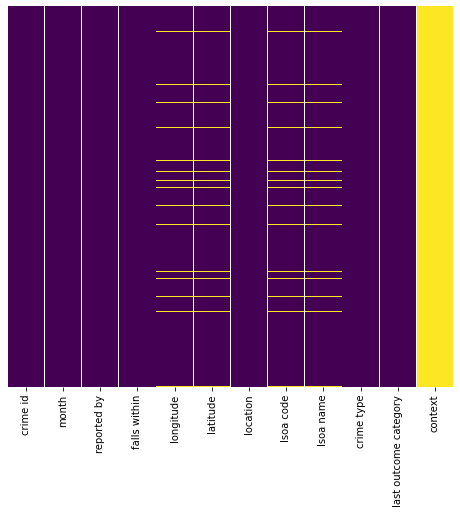

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualise the null values
plt.figure(figsize = (8,7))
sns.heatmap(other_cities_all.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

In [ ]:
# drop context column
other_cities_all.drop('context', inplace=True, axis=1)

In [ ]:
# fill in nulls
other_cities_all['last outcome category'] = other_cities_all['last outcome category'].fillna("Other not Known")

In [ ]:
# drop remaining nulls that cannot be filled in i.e., latitude, longitude
other_cities_all.dropna(inplace=True)

In [ ]:
# re-check for null values in dataset
other_cities_all.isna().sum()

crime id                 0
month                    0
reported by              0
falls within             0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
dtype: int64

In [ ]:
# drop unrelated columns - Falls within, and Context
other_cities_all.drop(['crime id', 'falls within'],axis=1, inplace=True)
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon 022C,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset 001A,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Further investigation is not in the public int...


In [ ]:
# remove last 5 characters from LSOA name values
other_cities_all['lsoa name'] = other_cities_all['lsoa name'].str[:-5]

# show first 3 rows after removing the last 5 characters from LSOA name
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,E01021311,Basildon,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,E01014399,Bath and North East Somerset,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,E01014399,Bath and North East Somerset,Criminal damage and arson,Further investigation is not in the public int...


In [ ]:
# remove first character from LSOA code values so only integer values remain
other_cities_all['lsoa code'] = other_cities_all['lsoa code'].str[1:]

# show first 3 rows after removing the first character from LSOA code
other_cities_all.head(3)

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,Avon and Somerset Constabulary,0.489518,51.560445,On or near Whytewaters,01021311,Basildon,Other crime,Investigation complete; no suspect identified
2,2018-01,Avon and Somerset Constabulary,-2.515072,51.419357,On or near Stockwood Hill,01014399,Bath and North East Somerset,Burglary,Status update unavailable
3,2018-01,Avon and Somerset Constabulary,-2.515816,51.408717,On or near Caroline Close,01014399,Bath and North East Somerset,Criminal damage and arson,Further investigation is not in the public int...


In [ ]:
# display count by LSOA code
x = other_cities_all['lsoa code'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = other_cities_all['lsoa code'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

01033010    22284
01033760    11705
01033756    11559
01033690    10346
01010994    10271
            ...  
01021598        1
01021417        1
01021311        1
01021243        1
01000115        1
Name: lsoa code, Length: 5248, dtype: int64


There are are 5248 categories 


In [ ]:
# display count by LSOA name
x = other_cities_all['lsoa name'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = other_cities_all['lsoa name'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Leeds                     366495
Bradford                  261950
Liverpool                 223188
Sheffield                 194924
Bristol                   173978
                           ...  
Hastings                       1
Southend-on-Sea                1
South Staffordshire            1
South Northamptonshire         1
Adur                           1
Name: lsoa name, Length: 275, dtype: int64


There are are 275 categories 


In [ ]:
# extract only related cities - Leeds, Bradford, Liverpool, Sheffield and Bristol

leeds_data = other_cities_all[other_cities_all['lsoa name'] == 'Leeds']
leeds_data.to_csv('leeds.csv')

In [ ]:
bradford_data = other_cities_all[other_cities_all['lsoa name'] == 'Bradford']
bradford_data.to_csv('bradford.csv')

In [ ]:
liverpool_data = other_cities_all[other_cities_all['lsoa name'] == 'Liverpool']
liverpool_data.to_csv('liverpool.csv')

In [ ]:
sheffield_data = other_cities_all[other_cities_all['lsoa name'] == 'Sheffield']
sheffield_data.to_csv('sheffield.csv')

In [ ]:
bristol_data = other_cities_all[other_cities_all['lsoa name'] == 'Bristol']
bristol_data.to_csv('bristol.csv')

In [ ]:
# merge all related cities 
c1 = pd.read_csv(r"C:\Users\User\five_cities\leeds.csv")
c2 = pd.read_csv(r"C:\Users\User\five_cities\bradford.csv")
c3 = pd.read_csv(r"C:\Users\User\five_cities\liverpool.csv")
c4 = pd.read_csv(r"C:\Users\User\five_cities\sheffield.csv")
c5 = pd.read_csv(r"C:\Users\User\five_cities\bristol.csv")


five_cities = pd.concat([c1, c2, c3, c4, c5])
five_cities.to_csv('five_cities.csv', index=False)

In [ ]:
# read and display first 3 rows of the dataset
five_cities = pd.read_csv('five_cities.csv')
five_cities.head(3)

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,54018,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified
1,54019,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified
2,54020,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified


In [ ]:
# display count by LSOA name
x = five_cities['lsoa name'].value_counts().sort_index(ascending=True).sort_values(ascending=False)
y = five_cities['lsoa name'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Leeds        366495
Bradford     261950
Liverpool    223188
Sheffield    194924
Bristol      173978
Name: lsoa name, dtype: int64


There are are 5 categories 


In [ ]:
# drop Unnamed column
five_cities.drop('Unnamed: 0', inplace=True, axis=1)

five_cities.to_csv('five_cities_2.csv')

In [ ]:
five_cities.head()

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category
0,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified
1,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified
2,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified
3,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect
4,2018-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Offender given community sentence


### Understand the Categorical Columns

In [ ]:
#ensure all data is displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#check different location types reported
x = five_cities['location'].value_counts()
y = five_cities['location'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

On or near Supermarket                            35789
On or near Parking Area                           26276
On or near Shopping Area                          25405
On or near Petrol Station                         17042
On or near Sports/Recreation Area                 14901
On or near Pedestrian Subway                      12324
On or near Nightclub                              11707
On or near Hospital                                8256
On or near Further/Higher Educational Building     3996
On or near Park/Open Space                         3401
On or near Theatre/Concert Hall                    3218
On or near Bus/Coach Station                       3031
On or near Police Station                          2743
On or near High Street                             2272
On or near Adelaide Street                         2172
On or near Prison                                  1959
On or near Conference/Exhibition Centre            1855
On or near Heathcroft Rise                      

In [ ]:
#check different crime types reported
x = five_cities['crime type'].value_counts()
y = five_cities['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    463991
Public order                    139385
Criminal damage and arson       129031
Other theft                      94682
Vehicle crime                    92373
Burglary                         91292
Shoplifting                      70628
Drugs                            49485
Other crime                      28174
Theft from the person            18043
Bicycle theft                    16658
Robbery                          16012
Possession of weapons            10781
Name: crime type, dtype: int64


There are are 13 categories 


In [ ]:
#check different outcome types 
x = five_cities['last outcome category'].value_counts()
y = five_cities['last outcome category'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Investigation complete; no suspect identified          446329
Unable to prosecute suspect                            445888
Status update unavailable                              135133
Court result unavailable                                64817
Under investigation                                     24285
Local resolution                                        24043
Awaiting court outcome                                  13094
Further investigation is not in the public interest     11781
Offender given a caution                                11653
Action to be taken by another organisation               7703
Further action is not in the public interest             6653
Formal action is not in the public interest              6131
Offender given a drugs possession warning                4809
Offender sent to prison                                  3964
Offender given community sentence                        3451
Defendant found not guilty                               2081
Offender

In [ ]:
five_cities.describe()

,longitude,latitude,lsoa code
count,1.220535e+06,1.220535e+06,1.220535e+06
mean,-1.988273e+00,5.333139e+01,1.014244e+06
std,5.759625e-01,7.865032e-01,8.898407e+03
min,-3.002089e+00,5.139996e+01,1.006512e+06
25%,-2.591272e+00,5.338264e+01,1.008098e+06
50%,-1.732999e+00,5.374436e+01,1.011322e+06
75%,-1.527028e+00,5.380211e+01,1.014542e+06
max,-1.306890e+00,5.394893e+01,1.033768e+06


# Adding covid columns 

In [203]:
# exploring data 
london = pd.read_csv('/Users/vasilina/Downloads/london_df.csv')
london

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.000,0
1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


In [216]:
# adding covid column 
london['covid'] = np.where(london['month'] <= '2020-02', 0, 1)
#london['covid'] = np.where(london['month'] > '2021-02', 1)
london

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Offender sent to prison,Barking and Dagenham,0.000,0
1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,Under investigation,Westminster,42.034,1
2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1
2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,Under investigation,Westminster,42.034,1


In [220]:
london.to_csv('/Users/vasilina/Downloads/london_df.csv')

In [206]:
other5 = pd.read_csv('/Users/vasilina/Downloads/other_cities_df.csv',
                     encoding='utf-8',
                     index_col=None)
other5

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,covid,date,stringency
0,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified,0,2018-01,0.000
1,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified,0,2018-01,0.000
2,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified,0,2018-01,0.000
3,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,0,2018-01,0.000
4,2018-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Offender given community sentence,0,2018-01,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,Avon and Somerset Constabulary,-2.560748,51.472315,On or near Glen Park,1014574,Bristol,Violence and sexual offences,Under investigation,1,2021-09,42.034
1220531,2021-09,Avon and Somerset Constabulary,-2.560484,51.473152,On or near Chisbury Street,1014574,Bristol,Violence and sexual offences,Under investigation,1,2021-09,42.034
1220532,2021-09,Avon and Somerset Constabulary,-2.559442,51.472717,On or near Apsley Street,1014574,Bristol,Violence and sexual offences,Unable to prosecute suspect,1,2021-09,42.034
1220533,2021-09,Avon and Somerset Constabulary,-2.560748,51.472315,On or near Glen Park,1014574,Bristol,Violence and sexual offences,Action to be taken by another organisation,1,2021-09,42.034


In [211]:
other5['covid'] = np.where(other5['month'] <= '2020-02', 0, 1)
other5

,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,covid,date,stringency
0,2018-01,West Yorkshire Police,-1.388671,53.935321,On or near Coxwold View,1011698,Leeds,Criminal damage and arson,Investigation complete; no suspect identified,0,2018-01,0.000
1,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Shoplifting,Investigation complete; no suspect identified,0,2018-01,0.000
2,2018-01,West Yorkshire Police,-1.388828,53.936031,On or near Coxwold Hill,1011698,Leeds,Vehicle crime,Investigation complete; no suspect identified,0,2018-01,0.000
3,2018-01,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,1011698,Leeds,Violence and sexual offences,Unable to prosecute suspect,0,2018-01,0.000
4,2018-01,West Yorkshire Police,-1.389567,53.938615,On or near Ainsty Crescent,1011698,Leeds,Violence and sexual offences,Offender given community sentence,0,2018-01,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,Avon and Somerset Constabulary,-2.560748,51.472315,On or near Glen Park,1014574,Bristol,Violence and sexual offences,Under investigation,1,2021-09,42.034
1220531,2021-09,Avon and Somerset Constabulary,-2.560484,51.473152,On or near Chisbury Street,1014574,Bristol,Violence and sexual offences,Under investigation,1,2021-09,42.034
1220532,2021-09,Avon and Somerset Constabulary,-2.559442,51.472717,On or near Apsley Street,1014574,Bristol,Violence and sexual offences,Unable to prosecute suspect,1,2021-09,42.034
1220533,2021-09,Avon and Somerset Constabulary,-2.560748,51.472315,On or near Glen Park,1014574,Bristol,Violence and sexual offences,Action to be taken by another organisation,1,2021-09,42.034


# One Hot Encoding

In [366]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [367]:
london = pd.read_csv('/Users/vasilina/Downloads/london_df.csv')

In [368]:
london.info()
print('*'*20, 'Unique values for each column: ')
print(london.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   month                  object 
 2   reported by            object 
 3   longitude              float64
 4   latitude               float64
 5   location               object 
 6   lsoa code              int64  
 7   lsoa name              object 
 8   crime type             object 
 9   last outcome category  object 
 10  borough_london         object 
 11  stringency             float64
 12  covid                  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 282.1+ MB
******************** Unique values for each column: 
Unnamed: 0               2844241
month                         45
reported by                    2
longitude                  57443
latitude                   54565
location                   35221
lsoa code                   4831

In [369]:
print(london.apply(lambda col: col.unique()))

Unnamed: 0               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
month                    [2018-01, 2018-02, 2018-03, 2018-04, 2018-05, ...
reported by              [Metropolitan Police Service, City of London P...
longitude                [0.140035, 0.135554, 0.137065, 0.134947, 0.140...
latitude                 [51.589112, 51.584985, 51.583672, 51.588063, 5...
location                 [On or near Beansland Grove, On or near Rose L...
lsoa code                [1000027, 1000028, 1000029, 1000030, 1000031, ...
lsoa name                [Barking and Dagenham 001A, Barking and Dagenh...
crime type               [Burglary, Criminal damage and arson, Other th...
last outcome category    [Offender sent to prison, Investigation comple...
borough_london           [Barking and Dagenham, Barnet, Bexley, Brent, ...
stringency               [0.0, 37.484, 79.63, 74.045, 70.97896552, 65.1...
covid                                                               [0, 1]
dtype: object


In [370]:
# as the outcome and crime type have many categories we have to combine some to use 
#one hot encoding

london['last outcome category'].value_counts()

Investigation complete; no suspect identified          1356572
Status update unavailable                              1046897
Under investigation                                     143068
Court result unavailable                                 99324
Local resolution                                         91980
Offender given a caution                                 25713
Offender given penalty notice                            20177
Awaiting court outcome                                   19965
Offender sent to prison                                   6281
Offender given a drugs possession warning                 6044
Offender given community sentence                         5847
Defendant found not guilty                                5058
Offender fined                                            4777
Court case unable to proceed                              3366
Offender given suspended prison sentence                  2542
Unable to prosecute suspect                            

In [371]:
# checking for all the unique values 
london['crime type'].value_counts()

Violence and sexual offences    748624
Vehicle crime                   404401
Other theft                     379307
Burglary                        256946
Criminal damage and arson       194401
Public order                    176016
Drugs                           156308
Theft from the person           149070
Shoplifting                     143337
Robbery                         104628
Bicycle theft                    77879
Other crime                      34046
Possession of weapons            19278
Name: crime type, dtype: int64

In [554]:
london['crime type'].nunique()

13

<AxesSubplot:xlabel='count', ylabel='last outcome category'>

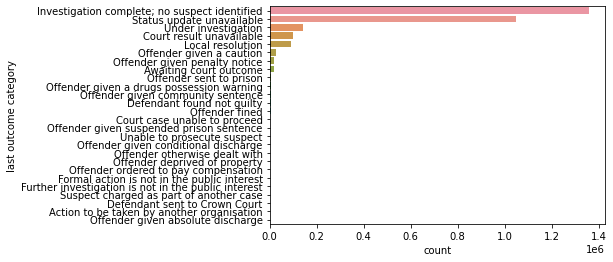

In [372]:
fig=plt.plot(figsize=(15,12), dpi=200)
sns.countplot(y='last outcome category', data=london, order=london['last outcome category'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='crime type'>

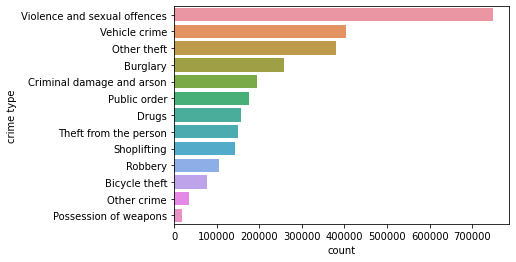

In [373]:
sns.countplot(y='crime type', data=london, order=london['crime type'].value_counts().index)

In [374]:
# replace these with 'suspect present;action taken'
replace_other = [
    'Local resolution', 'Offender given a caution', 'Offender sent to prison',
    'Offender given community sentence', 'Offender given penalty notice',
    'Defendant found not guilty', 'Offender given a drugs possession warning',
    'Offender fined', 'Court case unable to proceed',
    'Offender given suspended prison sentence',
    'Offender given conditional discharge', 'Unable to prosecute suspect',
    'Offender otherwise dealt with', 'Offender deprived of property',
    'Offender ordered to pay compensation', 'Awaiting court outcome',
    'Further investigation is not in the public interest',
    'Defendant sent to Crown Court',
    'Formal action is not in the public interest',
    'Suspect charged as part of another case',
    'Offender given absolute discharge', 'Under investigation',
    'Action to be taken by another organisation'
]
london['last outcome category'] = london['last outcome category'].replace(
    replace_other, 'suspect present; action taken')
london['last outcome category'] = london['last outcome category'].replace(
    'Court result unavailable', 'Status update unavailable')

london

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,suspect present; action taken,Barking and Dagenham,0.000,0
1,1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
2,2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
3,3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
4,4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,suspect present; action taken,Westminster,42.034,1
2844238,2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,suspect present; action taken,Westminster,42.034,1
2844239,2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,suspect present; action taken,Westminster,42.034,1


In [375]:
# borough, lsoa name, and location are represented by lsoa code so we drop them
cols = ['borough_london', 'lsoa name', 'location', 'reported by']
london = london.drop(cols, axis=1)

In [376]:
# ohe the two categorical cols
cat_cols = ['last outcome category', 'crime type']
london_ohe = pd.get_dummies(london, columns=cat_cols)
#ondon_ohe = pd.concat([london, ohe], axis=1)
print(type(london_ohe))

<class 'pandas.core.frame.DataFrame'>


In [377]:
london_ohe.columns

Index(['Unnamed: 0', 'month', 'longitude', 'latitude', 'lsoa code',
       'stringency', 'covid',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present; action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [378]:
# dropping index 
london_ohe = london_ohe.iloc[:,1:]
#london_ohe = london_ohe.drop(columns=['last outcome category', 'crime type'], axis=1)
print(london_ohe.shape)
london_ohe

(2844241, 22)


,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,crime type_Bicycle theft,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,2018-01,0.140035,51.589112,1000027,0.000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01,0.140035,51.589112,1000027,0.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01,0.135554,51.584985,1000027,0.000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01,0.140035,51.589112,1000027,0.000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01,0.135554,51.584985,1000027,0.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,-0.135532,51.489097,1004741,42.034,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2844237,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2844238,2021-09,-0.133400,51.489117,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2844239,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [379]:
# save 
london_ohe.to_csv('/Users/vasilina/Downloads/london_ohe.csv')

# London adding crime count

In [395]:
# adding a crime count column
london['month'] = pd.to_datetime(london['month'])
#df = other5.groupby(pd.Grouper(freq='M', key='date').sum())
collapsed_london = london.groupby(pd.Grouper(freq='M', key='month'))['crime type'].count()

In [396]:
collapsed_london = collapsed_london.to_frame()

In [397]:
collapsed_london['month'] = collapsed_london.index
collapsed_london.index = range(0,len(collapsed_london))

In [398]:
collapsed_london['month'] = collapsed_london['month'].astype(str).str[:-3]
print(collapsed_london)

    crime type    month
0        64679  2018-01
1        58614  2018-02
2        62817  2018-03
3        62269  2018-04
4        66002  2018-05
5        65393  2018-06
6        69301  2018-07
7        64528  2018-08
8        64272  2018-09
9        69389  2018-10
10       69703  2018-11
11       66738  2018-12
12       67773  2019-01
13       65877  2019-02
14       73572  2019-03
15       67977  2019-04
16       70383  2019-05
17       69736  2019-06
18       69256  2019-07
19       63895  2019-08
20       63326  2019-09
21       71543  2019-10
22       68776  2019-11
23       65919  2019-12
24       69864  2020-01
25       66466  2020-02
26       60812  2020-03
27       44265  2020-04
28       51756  2020-05
29       56526  2020-06
30       63679  2020-07
31       64580  2020-08
32       64442  2020-09
33       64270  2020-10
34       59213  2020-11
35       55122  2020-12
36       47958  2021-01
37       47535  2021-02
38       56772  2021-03
39       55805  2021-04
40       61347  

In [399]:
print(london.info())
london['month'] = london['month'].apply(lambda x: x.strftime('%Y-%m'))
print(london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   month                  datetime64[ns]
 2   longitude              float64       
 3   latitude               float64       
 4   lsoa code              int64         
 5   crime type             object        
 6   last outcome category  object        
 7   stringency             float64       
 8   covid                  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 195.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   month                  object 
 2   longitude              float64
 3   latitude               float64

In [400]:
# merge with original dataset 
merged_london = collapsed_london.merge(london_ohe, left_on='month', right_on='month')
merged_london.head(10)

,crime type,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,64679,2018-01,0.140035,51.589112,1000027,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64679,2018-01,0.135554,51.584985,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64679,2018-01,0.135554,51.584985,1000027,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,64679,2018-01,0.137065,51.583672,1000027,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,64679,2018-01,0.134947,51.588063,1000027,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,64679,2018-01,0.134947,51.588063,1000027,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,64679,2018-01,0.140634,51.583427,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
merged_london.columns

Index(['crime type', 'month', 'longitude', 'latitude', 'lsoa code',
       'stringency', 'covid',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present; action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [402]:
merged_london = merged_london.rename(columns={'crime type':'crimes count'})
merged_london

,crimes count,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,64679,2018-01,0.140035,51.589112,1000027,0.000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,64679,2018-01,0.140035,51.589112,1000027,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64679,2018-01,0.135554,51.584985,1000027,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,64679,2018-01,0.140035,51.589112,1000027,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64679,2018-01,0.135554,51.584985,1000027,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,63895,2021-09,-0.135532,51.489097,1004741,42.034,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2844237,63895,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2844238,63895,2021-09,-0.133400,51.489117,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2844239,63895,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [442]:
last_column1 = merged_london.pop('crimes count')
merged_london.insert(22, 'crimes count', last_column1)
#print(merged_london)

In [ ]:
# save to csv
merged_london.to_csv('/Users/vasilina/Downloads/london_ohe.csv', index=False)

# Other Cities

In [ ]:
# following same steps for all other cities
other5 = pd.read_csv('/Users/vasilina/Downloads/other_cities_df.csv')

In [521]:
other5.info()
print('*'*20, 'Unique values for each column: ')
print(other5.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1220535 non-null  int64  
 1   month                  1220535 non-null  object 
 2   reported by            1220535 non-null  object 
 3   longitude              1220535 non-null  float64
 4   latitude               1220535 non-null  float64
 5   location               1220535 non-null  object 
 6   lsoa code              1220535 non-null  int64  
 7   lsoa name              1220535 non-null  object 
 8   crime type             1220535 non-null  object 
 9   last outcome category  1220535 non-null  object 
 10  covid                  1220535 non-null  int64  
 11  date                   1220535 non-null  object 
 12  stringency             1220535 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 121.1+ MB
*************

In [522]:
other5['last outcome category'].value_counts()

Investigation complete; no suspect identified          446329
Unable to prosecute suspect                            445888
Status update unavailable                              135133
Court result unavailable                                64817
Under investigation                                     24285
Local resolution                                        24043
Awaiting court outcome                                  13094
Further investigation is not in the public interest     11781
Offender given a caution                                11653
Action to be taken by another organisation               7703
Further action is not in the public interest             6653
Formal action is not in the public interest              6131
Offender given a drugs possession warning                4809
Offender sent to prison                                  3964
Offender given community sentence                        3451
Defendant found not guilty                               2081
Offender

In [523]:
other5['crime type'].value_counts()

Violence and sexual offences    463991
Public order                    139385
Criminal damage and arson       129031
Other theft                      94682
Vehicle crime                    92373
Burglary                         91292
Shoplifting                      70628
Drugs                            49485
Other crime                      28174
Theft from the person            18043
Bicycle theft                    16658
Robbery                          16012
Possession of weapons            10781
Name: crime type, dtype: int64

In [553]:
other5['crime type'].nunique()

13

In [524]:
# borough, lsoa name, location are represented by lsoa code so we drop them
cols = ['date', 'lsoa name', 'location', 'reported by']
other5 = other5.drop(cols, axis=1)

<AxesSubplot:xlabel='count', ylabel='last outcome category'>

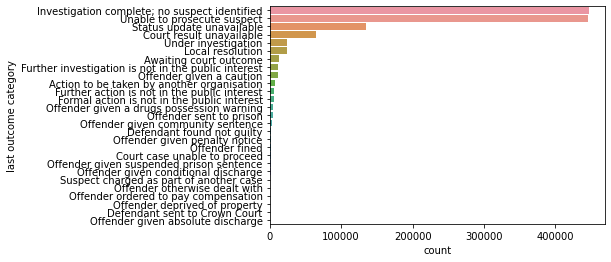

In [525]:
fig=plt.plot(figsize=(15,12), dpi=200)
sns.countplot(y='last outcome category', data=other5, order=other5['last outcome category'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='crime type'>

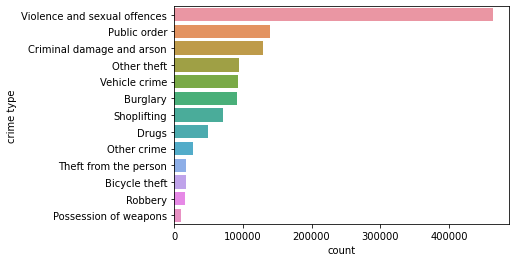

In [526]:
sns.countplot(y='crime type', data=other5, order=other5['crime type'].value_counts().index)

In [527]:
replace_other = ['Local resolution','Further action is not in the public interest', 'Offender given a caution', 'Offender sent to prison', 'Offender given community sentence', 'Offender given penalty notice', 'Defendant found not guilty', 'Offender given a drugs possession warning', 'Offender fined', 'Court case unable to proceed', 'Offender given suspended prison sentence', 'Offender given conditional discharge', 'Unable to prosecute suspect', 'Offender otherwise dealt with', 'Offender deprived of property', 'Offender ordered to pay compensation', 'Awaiting court outcome', 'Further investigation is not in the public interest', 'Defendant sent to Crown Court', 'Formal action is not in the public interest', 'Suspect charged as part of another case', 'Offender given absolute discharge', 'Under investigation', 'Action to be taken by another organisation']
other5['last outcome category'] = other5['last outcome category'].replace(replace_other, 'suspect present or action taken')
other5['last outcome category'] = other5['last outcome category'].replace('Court result unavailable', 'Status update unavailable')

other5

,Unnamed: 0,month,longitude,latitude,lsoa code,crime type,last outcome category,covid,stringency
0,0,2018-01,-1.388671,53.935321,1011698,Criminal damage and arson,Investigation complete; no suspect identified,0,0.000
1,1,2018-01,-1.391328,53.938003,1011698,Shoplifting,Investigation complete; no suspect identified,0,0.000
2,2,2018-01,-1.388828,53.936031,1011698,Vehicle crime,Investigation complete; no suspect identified,0,0.000
3,3,2018-01,-1.391328,53.938003,1011698,Violence and sexual offences,suspect present or action taken,0,0.000
4,4,2018-01,-1.389567,53.938615,1011698,Violence and sexual offences,suspect present or action taken,0,0.000
...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220531,1220531,2021-09,-2.560484,51.473152,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220532,1220532,2021-09,-2.559442,51.472717,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220533,1220533,2021-09,-2.560748,51.472315,1014574,Violence and sexual offences,suspect present or action taken,1,42.034


In [528]:
# ohe the two categorical cols
cat_cols2 = ['last outcome category', 'crime type']
other_ohe = pd.get_dummies(other5, columns=cat_cols2)
#print(type(other_ohe))
other_ohe

,Unnamed: 0,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220531,1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220532,1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220533,1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [517]:
other5

,Unnamed: 0,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Further action is not in the public interest,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,0,2018-01,-1.388671,53.935321,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-01,-1.391328,53.938003,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2018-01,-1.388828,53.936031,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220531,1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220532,1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220533,1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [501]:
other_ohe.columns

Index(['month', 'longitude', 'latitude', 'lsoa code', 'covid', 'stringency',
       'last outcome category_Further action is not in the public interest',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present or action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [529]:
# dropping index 
other_ohe = other_ohe.iloc[:,1:]
#london_ohe = london_ohe.drop(columns=['last outcome category', 'crime type'], axis=1)
print(other_ohe.shape)
other_ohe

(1220535, 22)


,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,crime type_Bicycle theft,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [530]:
#other_ohe.to_csv('/Users/vasilina/Downloads/other_ohe.csv')

# Other: adding crime count column

In [531]:
other5['month'] = pd.to_datetime(other5['month'])
#df = other5.groupby(pd.Grouper(freq='M', key='date').sum())
collapsed = other5.groupby(pd.Grouper(freq='M', key='month'))['crime type'].count()

In [532]:
collapsed = collapsed.to_frame()

In [533]:
collapsed['month'] = collapsed.index
collapsed.index = range(0,len(collapsed))

In [534]:
collapsed['month'] = collapsed['month'].astype(str).str[:-3]
print(collapsed)

    crime type    month
0        26435  2018-01
1        24050  2018-02
2        26916  2018-03
3        27266  2018-04
4        29216  2018-05
5        27819  2018-06
6        29275  2018-07
7        28461  2018-08
8        27937  2018-09
9        29757  2018-10
10       28698  2018-11
11       26971  2018-12
12       27435  2019-01
13       25086  2019-02
14       28406  2019-03
15       27266  2019-04
16       27983  2019-05
17       27248  2019-06
18       29115  2019-07
19       28043  2019-08
20       27574  2019-09
21       29451  2019-10
22       28786  2019-11
23       27649  2019-12
24       28313  2020-01
25       26366  2020-02
26       26174  2020-03
27       20758  2020-04
28       23219  2020-05
29       24796  2020-06
30       27918  2020-07
31       28128  2020-08
32       26779  2020-09
33       26750  2020-10
34       25444  2020-11
35       23877  2020-12
36       22812  2021-01
37       21851  2021-02
38       26366  2021-03
39       26022  2021-04
40       28379  

In [535]:
print(other5.info())
other5['month'] = other5['month'].apply(lambda x: x.strftime('%Y-%m'))
print(other5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1220535 non-null  int64         
 1   month                  1220535 non-null  datetime64[ns]
 2   longitude              1220535 non-null  float64       
 3   latitude               1220535 non-null  float64       
 4   lsoa code              1220535 non-null  int64         
 5   crime type             1220535 non-null  object        
 6   last outcome category  1220535 non-null  object        
 7   covid                  1220535 non-null  int64         
 8   stringency             1220535 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 83.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 9 columns):
 #   Column       

In [547]:
# merge with original dataset 
merged = collapsed.merge(other_ohe, left_on='month', right_on='month')
merged.head(10)

,crime type,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,26435,2018-01,-1.388671,53.935321,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26435,2018-01,-1.391328,53.938003,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26435,2018-01,-1.388828,53.936031,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,26435,2018-01,-1.391328,53.938003,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,26435,2018-01,-1.389567,53.938615,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,26435,2018-01,-1.389025,53.934028,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,26435,2018-01,-1.386450,53.941340,1011699,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,26435,2018-01,-1.396755,53.939828,1011699,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,26435,2018-01,-1.385028,53.935473,1011701,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,26435,2018-01,-1.385655,53.933247,1011701,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [548]:
merged.columns

Index(['crime type', 'month', 'longitude', 'latitude', 'lsoa code', 'covid',
       'stringency',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present or action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [549]:
merged = merged.rename(columns={'crime type':'crimes count'})

In [550]:
# adding crime count col to end of df
last_column = merged.pop('crimes count')
merged.insert(22, 'crimes count', last_column)

# save to csv
merged.to_csv('/Users/vasilina/Downloads/other_ohe.csv', index=0)

In [551]:
merged

,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,crime type_Bicycle theft,...,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences,crimes count
0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26435
1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,26435
2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,26435
3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,26435
4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,26435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
